In [1]:
# Import relevant packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
import time
import seaborn as sns
import random
import math

C:\Users\robur\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
os.getcwd()

'C:\\Users\\robur\\Documents\\Thesis\\code\\lcfMapping\\markov'

In [3]:
# Read in excel files
pred2015 = pd.read_csv("../../data/output/wurChange/predictions-2015-median.csv")
pred2016 = pd.read_csv("../../data/output/wurChange/predictions-2016-median.csv")
pred2017 = pd.read_csv("../../data/output/wurChange/predictions-2017-median.csv")
pred2018 = pd.read_csv("../../data/output/wurChange/predictions-2018-median.csv")
classes = list(pred2015.columns)

pred2015

,tree,shrub,grassland,crops,urban_built_up,bare,water
0,0.000000,2.352941,68.235294,0.000000,29.411765,0.000000,0.0
1,25.327511,6.550218,68.122271,0.000000,0.000000,0.000000,0.0
2,3.947368,23.684211,59.210526,0.000000,0.000000,13.157895,0.0
3,0.000000,8.333333,6.666667,0.000000,75.000000,10.000000,0.0
4,12.987013,14.285714,72.727273,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...
30484,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
30485,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
30486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
30487,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.0


In [7]:
print(pred2015.shape, pred2016.shape, pred2017.shape, pred2018.shape)

(30489, 7) (30489, 7) (30489, 7) (30489, 7)


In [8]:
pred2015.isna().sum()

tree              0
shrub             0
grassland         0
crops             0
urban_built_up    0
bare              0
water             0
dtype: int64

In [9]:
for i in range(len(classes)):
    print(classes[i])

tree
shrub
grassland
crops
urban_built_up
bare
water


In [10]:
# Try index in pred2015

i=1; j=1
# i=6; j=2 #(100,50,15,3)
print("2015:", pred2015.iloc[i][j])
print("2016:", pred2016.iloc[i][j])
print("2017:", pred2017.iloc[i][j])
print("2018:", pred2018.iloc[i][j])

2015: 6.55021834061135
2016: 10.1694915254237
2017: 19.672131147541
2018: 20.0


In [ ]:
# Tryout energy of coocc

In [ ]:
# Energy = RF + Past + Future + Class1 + Class2 + ... + Class6

In [ ]:
# If positive coocc:
# EnergyClass1 = 0

# If negative coocc:
# abs(coocc) * (class*class)



# Alternative with 0-1 coocc matrix (this one now used)
# -log(coocc) * (class*class)

In [15]:
# Read in IIASA Change data 
# Required to calculate cooccurence matrix
#test = gpd.read_file("../data/processed/IIASAchangeHarmonics.gpkg")
#df = pd.DataFrame(test.drop(columns='geometry'))
#df

df = pd.read_csv("../../data/processed/IIASAchangeMerged.csv")
df2015 = df.loc[df['reference_year'] == 2015]
df2016 = df.loc[df['reference_year'] == 2016]
df2017 = df.loc[df['reference_year'] == 2017]
df2018 = df.loc[df['reference_year'] == 2018]

df2015 = df2015[df2015.columns.intersection(classes)]
df2016 = df2016[df2015.columns.intersection(classes)]
df2017 = df2017[df2015.columns.intersection(classes)]
df2018 = df2018[df2015.columns.intersection(classes)]

# can use each year, does not impact the matrix probablities too much. now used 2015  
df2015
(df2015 > 0).sum()

bare               5317
crops              6987
grassland         22551
shrub             16802
tree              15714
urban_built_up     2239
water              2853
dtype: int64

In [16]:
# Read in other datasets (not needed)
# IIASA 2015

dfTraining = pd.read_csv("../../data/processed/IIASAtrainingMerged.csv")
dfTraining = dfTraining[dfTraining.columns.intersection(classes)]
print(dfTraining[0:10].to_string())

print("\nTotal class occurrence", list((dfTraining > 0).sum()))

   bare  crops  grassland  shrub  tree  urban_built_up  water
0   0.0    0.0       51.0   41.0   0.0             8.0    0.0
1   0.0    0.0       74.0   26.0   0.0             0.0    0.0
2   0.0    0.0       67.0   14.0  19.0             0.0    0.0
3  31.0    0.0       36.0    0.0   0.0             0.0   33.0
4   0.0    0.0        0.0  100.0   0.0             0.0    0.0
5   0.0    0.0       54.0   46.0   0.0             0.0    0.0
6   0.0    0.0       17.0   82.0   1.0             0.0    0.0
7   0.0    0.0      100.0    0.0   0.0             0.0    0.0
8   0.0    0.0       20.0   80.0   0.0             0.0    0.0
9   0.0    0.0       47.0   53.0   0.0             0.0    0.0

Total class occurrence [30279, 23075, 77464, 54904, 69854, 7428, 7928]


In [19]:
# New coocc normalise before multiplication with transpose

binary = (df2015 > 0).astype(int)
#rawnorm = df2015.apply(lambda x: (x-x.mean())/x.std())
rawnorm = df2015.apply(lambda x: (x)/np.sqrt((x**2).sum()))
#rawnorm = binary.apply(lambda x: (x)/np.sqrt((x**2).sum()))

znorm = rawnorm.T.dot(rawnorm)#/(len(rawnorm)-1)
znorm

,bare,crops,grassland,shrub,tree,urban_built_up,water
bare,1.000000,0.021305,0.062780,0.044212,0.019094,0.031306,0.018607
crops,0.021305,1.000000,0.030002,0.053645,0.037884,0.046966,0.003104
grassland,0.062780,0.030002,1.000000,0.199602,0.099011,0.057143,0.019791
shrub,0.044212,0.053645,0.199602,1.000000,0.125258,0.050367,0.008727
tree,0.019094,0.037884,0.099011,0.125258,1.000000,0.079661,0.013248
urban_built_up,0.031306,0.046966,0.057143,0.050367,0.079661,1.000000,0.006429
water,0.018607,0.003104,0.019791,0.008727,0.013248,0.006429,1.000000


<AxesSubplot:>

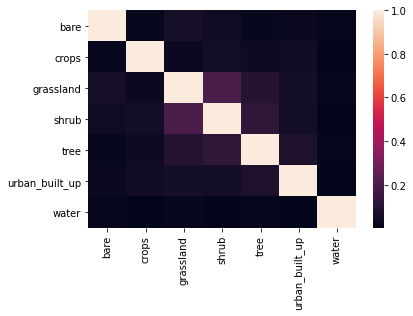

In [20]:
znorm > 0
sns.heatmap(znorm)

In [ ]:
## Start of Markov chain building

RF-values:
          tree      shrub  grassland  crops  urban_built_up      bare  water
2015  4.761905  10.714286  25.000000    0.0       55.952381  3.571429    0.0
2016  2.580645   7.741935  26.451613    0.0       60.645161  2.580645    0.0
2017  4.761905   7.936508  44.444444    0.0       33.333333  9.523810    0.0
2018  8.474576   8.474576  59.322034    0.0       23.728814  0.000000    0.0

New values:
          tree     shrub  grassland  crops  urban_built_up      bare  water
2015  3.261905  8.614286  28.000000    0.0       52.652381  2.171429    0.0
2016  2.980645  7.541935  31.851613    0.0       50.045161  2.380645    0.0
2017  4.161905  7.236508  42.044444    0.0       37.533333  3.923810    0.0
2018  5.774576  7.374576  50.422034    0.0       30.128814  1.200000    0.0

 2015    94.7
2016    94.8
2017    94.9
2018    94.9
dtype: float64

Total run time: 0.0507206916809082
Part run time 0.0


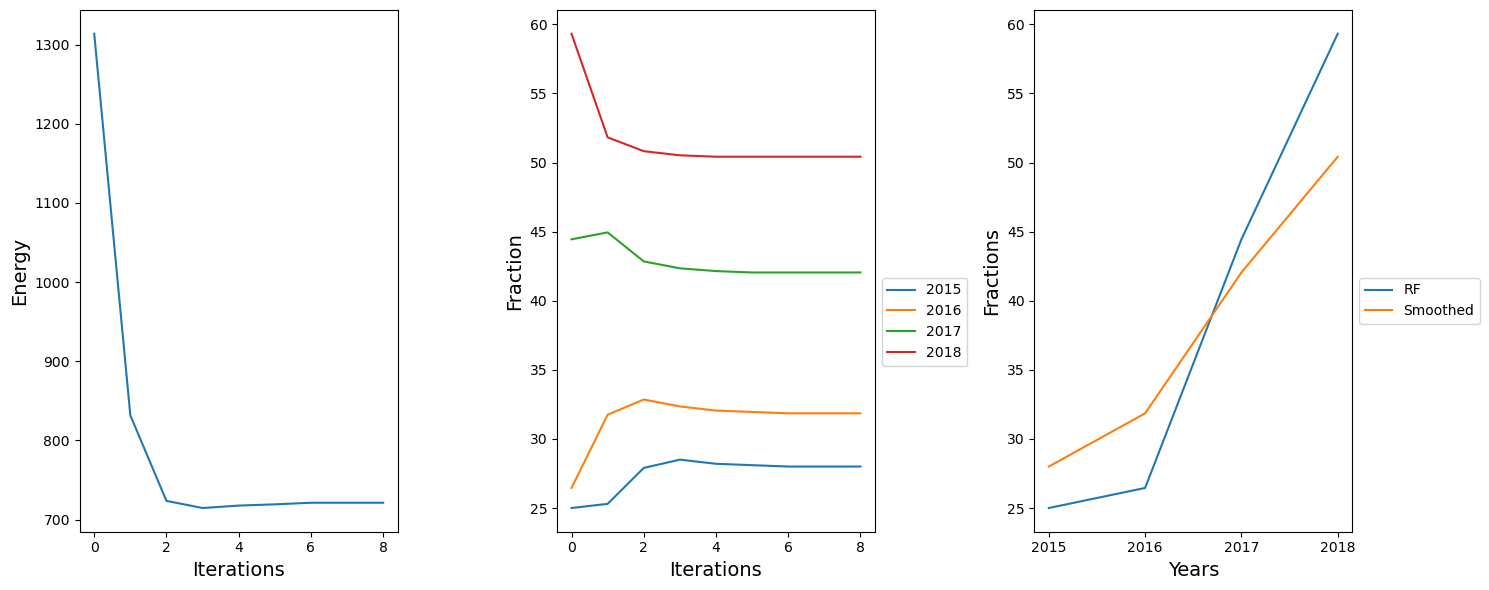

In [51]:
# Apply Markov chain model on ONE point only and check results.
t0 = time.time() # timer



i=1383

listofdicts = [dict(pred2015.iloc[i]),dict(pred2016.iloc[i]),dict(pred2017.iloc[i]),dict(pred2018.iloc[i])]
point_data = pd.DataFrame([pred2015.iloc[i],pred2016.iloc[i],pred2017.iloc[i],pred2018.iloc[i]], 
                          index=[2015, 2016, 2017, 2018])
print("RF-values:")
print(point_data.to_string())
#      tree shrub grass crops ... 
# 2015
# 2016
# 2017
# 2018

random.shuffle(classes)

# for j in classes:...
#j=1
for j in range(len(classes)):
    
    #initialise    
    rf2015 = listofdicts[0][classes[j]]
    rf2016 = listofdicts[1][classes[j]]
    rf2017 = listofdicts[2][classes[j]]
    rf2018 = listofdicts[3][classes[j]]
    
    node2015 = rf2015
    node2016 = rf2016
    node2017 = rf2017
    node2018 = rf2018

    # Stepsize to find optimal fraction
    stepsize = .1
    plot = True

    # Keep track of nodes over iterations (useful to check with plot=True)
    nodeSim2015 = []
    nodeSim2016 = []
    nodeSim2017 = []
    nodeSim2018 = []
    nodeSim2015.append(node2015)
    nodeSim2016.append(node2016)
    nodeSim2017.append(node2017)
    nodeSim2018.append(node2018)

    # Within-year classes
    otherClasses = classes[:j] + classes[j+1:]
    #print("\nOther classes:", otherClasses)
    other2015 = {key: listofdicts[0][key] for key in otherClasses}
    other2016 = {key: listofdicts[1][key] for key in otherClasses}
    other2017 = {key: listofdicts[2][key] for key in otherClasses}
    other2018 = {key: listofdicts[3][key] for key in otherClasses}
   

    # Within-year energy 2015
    corr = znorm.loc[classes[j]][other2015.keys()]
    log = corr.apply(lambda x: -math.log(x))
    keys = list(log.index)
    within2015 = sum([other2015[key] * log[key] for key in keys])

    # Within-year energy 2016
    corr = znorm.loc[classes[j]][other2016.keys()]
    log = corr.apply(lambda x: -math.log(x))
    keys = list(log.index)
    within2016 = sum([other2016[key] * log[key] for key in keys])
    
    # Within-year energy 2017
    corr = znorm.loc[classes[j]][other2017.keys()]
    log = corr.apply(lambda x: -math.log(x))
    keys = list(log.index)
    within2017 = sum([other2017[key] * log[key] for key in keys])
    
    # Within-year energy 2018
    corr = znorm.loc[classes[j]][other2018.keys()]
    log = corr.apply(lambda x: -math.log(x))
    keys = list(log.index)
    within2018 = sum([other2018[key] * log[key] for key in keys])
    
    
    t1 = time.time()

    eTotal = []
    eTotal.append(calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                    edges = ((rf2015,node2016),
                                             (rf2016,node2015,node2017),
                                             (rf2017,node2016,node2018),
                                             (rf2018,node2017)),
                                    edges_within = (within2015,within2016,within2017,within2018)))

    e = calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                          edges = ((rf2015,node2016),
                                   (rf2016,node2015,node2017),
                                   (rf2017,node2016,node2018),
                                   (rf2018,node2017)),
                          edges_within = (within2015,within2016,within2017,within2018))
    #print(e) # now edges_wihtin implemented in calc_energy and calc_total_energy
    # todo: implement in optimise_node and minimise_node -> done

    
    
    
    t2 = time.time()

    
    
    
    
    # Iterations over one chain
    for k in range(10):

        
        # Stop if total energy remains stable 3 iterations in a row
        if len(eTotal) >= 5 and eTotal[k] == eTotal[k-1] == eTotal[k-2]:
            break

        # Optimise node's value of 2015
        node2015 = optimise_node(node2015, edges=(rf2015,node2016), edges_within=within2015, stepsize=stepsize)
        nodeSim2015.append(node2015)
        
        # Optimise node's value of 2016
        node2016 = optimise_node(node2016, edges=(rf2016,node2015,node2017), edges_within=within2016, stepsize=stepsize)
        nodeSim2016.append(node2016)

        # Optimise node's value of 2017
        node2017 = optimise_node(node2017, edges=(rf2017,node2016,node2018), edges_within=within2017, stepsize=stepsize)
        nodeSim2017.append(node2017)

        # Optimise node's value of 2018
        node2018 = optimise_node(node2018, edges=(rf2018,node2017), edges_within=within2018, stepsize=stepsize)
        nodeSim2018.append(node2018)            
            
        # Calculate and store new total energy
        nodes = (node2015, node2016, node2017, node2018)
        edges = ((rf2015,node2016),(rf2016,node2015,node2017),(rf2017,node2016,node2018),(rf2018,node2017))
        e = calc_total_energy(nodes,edges,(within2015,within2016,within2017,within2018))
        eTotal.append(e)

    
    # print(" Final node 2015:", node2015)
    # print(" Final node 2016:", node2016)
    # print(" Final node 2017:", node2017)
    # print(" Final node 2018:", node2018,"\n")

    # update point_data with optimised nodes
    listofdicts[0][classes[j]] = node2015
    listofdicts[1][classes[j]] = node2016
    listofdicts[2][classes[j]] = node2017
    listofdicts[3][classes[j]] = node2018
    

print("\nNew values:")
#print(point_data.to_string())

print(pd.DataFrame(listofdicts, index=(2015,2016,2017,2018)))

print("\n",pd.DataFrame(listofdicts, index=(2015,2016,2017,2018)).sum(axis=1))


t3 = time.time() # timer
print("\nTotal run time:", t3-t0)
print("Part run time", t2-t1)





# Now done for one class
# TODO: make it applicable for all classes of this point
if plot == True:
    plot_simulations(eTotal, nodeSim2015, nodeSim2016, nodeSim2017, nodeSim2018)

In [52]:
# Run on all/part points

# Set up
smooth2015 = []
smooth2016 = []
smooth2017 = []
smooth2018 = []
t0 = time.time() # timer

for i in range(len(pred2015)):
#for i in range(1000):

    listofdicts = [dict(pred2015.iloc[i]),dict(pred2016.iloc[i]),dict(pred2017.iloc[i]),dict(pred2018.iloc[i])]
    
    random.shuffle(classes)

    for j in range(len(classes)):

        #initialise    
        rf2015 = listofdicts[0][classes[j]]
        rf2016 = listofdicts[1][classes[j]]
        rf2017 = listofdicts[2][classes[j]]
        rf2018 = listofdicts[3][classes[j]]

        node2015 = rf2015
        node2016 = rf2016
        node2017 = rf2017
        node2018 = rf2018

        # Stepsize to find optimal fraction
        stepsize = 1
        plot = False

        # Keep track of nodes over iterations (useful to check with plot=True)
        nodeSim2015 = []
        nodeSim2016 = []
        nodeSim2017 = []
        nodeSim2018 = []
        nodeSim2015.append(node2015)
        nodeSim2016.append(node2016)
        nodeSim2017.append(node2017)
        nodeSim2018.append(node2018)

        # Within-year classes
        otherClasses = classes[:j] + classes[j+1:]
        other2015 = {key: listofdicts[0][key] for key in otherClasses}
        other2016 = {key: listofdicts[1][key] for key in otherClasses}
        other2017 = {key: listofdicts[2][key] for key in otherClasses}
        other2018 = {key: listofdicts[3][key] for key in otherClasses}

        # Within-year energy 2015
        corr = znorm.loc[classes[j]][other2015.keys()]
        log = corr.apply(lambda x: -math.log(x))
        keys = list(log.index)
        within2015 = sum([other2015[key] * log[key] for key in keys])

        # Within-year energy 2016
        corr = znorm.loc[classes[j]][other2016.keys()]
        log = corr.apply(lambda x: -math.log(x))
        keys = list(log.index)
        within2016 = sum([other2016[key] * log[key] for key in keys])

        # Within-year energy 2017
        corr = znorm.loc[classes[j]][other2017.keys()]
        log = corr.apply(lambda x: -math.log(x))
        keys = list(log.index)
        within2017 = sum([other2017[key] * log[key] for key in keys])

        # Within-year energy 2018
        corr = znorm.loc[classes[j]][other2018.keys()]
        log = corr.apply(lambda x: -math.log(x))
        keys = list(log.index)
        within2018 = sum([other2018[key] * log[key] for key in keys])

        eTotal = []
        eTotal.append(calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                                        edges = ((rf2015,node2016),
                                                 (rf2016,node2015,node2017),
                                                 (rf2017,node2016,node2018),
                                                 (rf2018,node2017)),
                                        edges_within = (within2015,within2016,within2017,within2018)))

        e = calc_total_energy(nodes = (node2015, node2016, node2017, node2018),
                              edges = ((rf2015,node2016),
                                       (rf2016,node2015,node2017),
                                       (rf2017,node2016,node2018),
                                       (rf2018,node2017)),
                              edges_within = (within2015,within2016,within2017,within2018))

        
        # Iterations over one chain
        for k in range(10):

            # Stop if total energy remains stable 3 iterations in a row
            if len(eTotal) >= 5 and eTotal[k] == eTotal[k-1] == eTotal[k-2]:
                break

            # Optimise node's value of 2015
            node2015 = optimise_node(node2015, edges=(rf2015,node2016), edges_within=within2015, stepsize=stepsize)
            nodeSim2015.append(node2015)

            # Optimise node's value of 2016
            node2016 = optimise_node(node2016, edges=(rf2016,node2015,node2017), edges_within=within2016, stepsize=stepsize)
            nodeSim2016.append(node2016)

            # Optimise node's value of 2017
            node2017 = optimise_node(node2017, edges=(rf2017,node2016,node2018), edges_within=within2017, stepsize=stepsize)
            nodeSim2017.append(node2017)

            # Optimise node's value of 2018
            node2018 = optimise_node(node2018, edges=(rf2018,node2017), edges_within=within2018, stepsize=stepsize)
            nodeSim2018.append(node2018)            

            # Calculate and store new total energy
            nodes = (node2015, node2016, node2017, node2018)
            edges = ((rf2015,node2016),(rf2016,node2015,node2017),(rf2017,node2016,node2018),(rf2018,node2017))
            e = calc_total_energy(nodes,edges,(within2015,within2016,within2017,within2018))
            eTotal.append(e)

        # update point_data with optimised nodes
        listofdicts[0][classes[j]] = node2015
        listofdicts[1][classes[j]] = node2016
        listofdicts[2][classes[j]] = node2017
        listofdicts[3][classes[j]] = node2018

        
    # Save updated values in list
    smooth2015.append([fraction for fraction in listofdicts[0].values()])
    smooth2016.append([fraction for fraction in listofdicts[1].values()])
    smooth2017.append([fraction for fraction in listofdicts[2].values()])
    smooth2018.append([fraction for fraction in listofdicts[3].values()])


t1 = time.time() # timer
print("Total run time:", t1-t0)
#print("Part run time", t2-t1)

# Lists to df
smooth2015 = pd.DataFrame(smooth2015, columns=list(pred2015.columns))
smooth2016 = pd.DataFrame(smooth2016, columns=list(pred2015.columns))
smooth2017 = pd.DataFrame(smooth2017, columns=list(pred2015.columns))
smooth2018 = pd.DataFrame(smooth2018, columns=list(pred2015.columns))

# Replace <0 and >100 values before normalisation
smooth2015[smooth2015 < 0] = 0
smooth2015[smooth2015 > 100] = 100
smooth2016[smooth2016 < 0] = 0
smooth2016[smooth2016 > 100] = 100
smooth2017[smooth2017 < 0] = 0
smooth2017[smooth2017 > 100] = 100
smooth2018[smooth2018 < 0] = 0
smooth2018[smooth2018 > 100] = 100

# Normalise all classes to add up to 100%
smooth2015 = smooth2015.div(smooth2015.sum(axis=1), axis=0) * 100
smooth2016 = smooth2016.div(smooth2016.sum(axis=1), axis=0) * 100
smooth2017 = smooth2017.div(smooth2017.sum(axis=1), axis=0) * 100
smooth2018 = smooth2018.div(smooth2018.sum(axis=1), axis=0) * 100

# Replace NaN values with 0 (NaN resulting from normalisation)
smooth2015 = smooth2015.replace(np.nan, 0)
smooth2016 = smooth2016.replace(np.nan, 0)
smooth2017 = smooth2017.replace(np.nan, 0)
smooth2018 = smooth2018.replace(np.nan, 0)

print("Done")

Total run time: 1008.9624512195587
Done


In [19]:
# RUN TIME WITH COOCC 
# total run time for one point: 0.5s
# run time for one calc energy: 0.007s

# RUN TIME WITHOUT COOCC
# total run time for one point: 0.006s
# run time for one calc energy: 0.0s



# seems to be going long at calc_energy function. 
# edit: managed now to calc e_coocc before calc_energy


In [ ]:
# How to change the paramters to get the optimal output:

# Coocc new 01:
# stepsize = 1
# param = 0.1

# Coocc new 001:
# stepsize = 1
# param = 0.01

# Coocc new 0001:
# stepsize = 1
# param = 0.001


In [305]:
# Save markov results (change coocc param in name)
smooth2015.to_csv("../../data/output/markov/smooth2015-coocc-new-001.csv",index=False)
smooth2016.to_csv("../../data/output/markov/smooth2016-coocc-new-001.csv",index=False)
smooth2017.to_csv("../../data/output/markov/smooth2017-coocc-new-001.csv",index=False)
smooth2018.to_csv("../../data/output/markov/smooth2018-coocc-new-001.csv",index=False)

In [31]:
# Save original markov results (without coocc) (NOT USED as final output)
smooth2015.to_csv("../../data/output/markov/smooth2015-basic.csv",index=False)
smooth2016.to_csv("../../data/output/markov/smooth2016-basic.csv",index=False)
smooth2017.to_csv("../../data/output/markov/smooth2017-basic.csv",index=False)
smooth2018.to_csv("../../data/output/markov/smooth2018-basic.csv",index=False)

In [ ]:
## FUNCTIONS ##

# NEED TO BE RUN BEFORE 

In [11]:
# optimise_node

def optimise_node(node, edges, edges_within, stepsize=5):

    # describe edges
    # 2 edges: rf2015 + node2016
    e = calc_energy(node, edges, edges_within)
    
    # Create empty list to keep track of energy
    eSim = []
    eSim.append(e)
    #print("Initial Energy:", eSim[0])

    #print("Start simulation...")
    node = minimise_energy(node, edges, edges_within, eSim, stepsize)
    #print("New node:", node)
    #print("Energy:", eSim)
    
    
    return node

In [12]:
def calc_energy(node, edges, edges_within):
    
    # Old below
    # Gather co-occurence correlations of other classes
    #corr = znorm.loc[classes[j]][other2015.keys()]#[list(edges_within.index.values)]

    # Only penalise the negative correlations, and take the absolute value
    #e_abs = abs(corr[corr < 0])
    #neg_classes = list(e_abs.index.values)

    # Compute energy of all classes
    # sum(abs(corr)*(node*class))
    #e_coocc = sum([(e_abs[classname] * (node * edges_within[classname])) for classname in neg_classes])

    
    
    # New below
    
    param = 0.01
    e_coocc = edges_within * node * param
    
    
    # Old below
    edge1 = edges[0]
    edge2 = edges[1]
    
    e1 = (node - edge1)**2
    e2 = (node - edge2)**2
    
    if len(edges) == 3:
        edge3 = edges[2]
        e3 = (node - edge3)**2
        return e1 + e2 + e_coocc + e3
    
    return e1 + e2 + e_coocc


def calc_total_energy(nodes, edges, edges_within):
    
    node2015 = nodes[0]
    node2016 = nodes[1]
    node2017 = nodes[2]
    node2018 = nodes[3]
    
    edges2015 = edges[0]
    edges2016 = edges[1]
    edges2017 = edges[2]
    edges2018 = edges[3]
    
    edges_within2015 = edges_within[0]
    edges_within2016 = edges_within[1]
    edges_within2017 = edges_within[2]
    edges_within2018 = edges_within[3]
    
    e2015 = calc_energy(node2015, edges2015, edges_within2015)
    e2016 = calc_energy(node2016, edges2016, edges_within2016)
    e2017 = calc_energy(node2017, edges2017, edges_within2017)
    e2018 = calc_energy(node2018, edges2018, edges_within2018)
    
    return e2015 + e2016 + e2017 + e2018
    
    
def minimise_energy(node, edges, edges_within, eSim, stepsize):
    
    i = 0
    #print(i)
    
    if calc_energy(node + stepsize, edges, edges_within) < eSim[i] and (node + stepsize) <= 100:
        node = node + stepsize
        i += 1
        eSim.append(calc_energy(node, edges, edges_within))
        
        while calc_energy(node + stepsize, edges, edges_within) < eSim[i] and (node + stepsize) <= 100:
            node = node + stepsize
            i += 1
            eSim.append(calc_energy(node,edges, edges_within))
        
    elif calc_energy(node - stepsize, edges, edges_within) < eSim[i] and (node - stepsize) >= 0:
        node = node - stepsize
        i += 1
        eSim.append(calc_energy(node, edges, edges_within))
        
        while calc_energy(node - stepsize, edges, edges_within) < eSim[i] and (node - stepsize) >= 0:
            node = node - stepsize
            i += 1
            eSim.append(calc_energy(node, edges, edges_within))
    
    return node


In [13]:
def plot_simulations(eTotal, nodeSim2015, nodeSim2016, nodeSim2017, nodeSim2018):

    # Plot energy over iterations
    xs = [x for x in range(len(eTotal))]
    plt.figure(figsize=(15,6), dpi= 100)
    plt.subplot(1, 3, 1)
    plt.plot(xs, eTotal)
    plt.ylabel('Energy', fontsize=14)
    plt.xlabel('Iterations', fontsize=14)

    # Plot nodes over iterations
    xs = [x for x in range(len(nodeSim2015))]
    plt.subplot(1, 3, 2)
    plt.plot(xs, nodeSim2015)
    plt.plot(xs, nodeSim2016)
    plt.plot(xs, nodeSim2017)
    plt.plot(xs, nodeSim2018)
    plt.ylabel('Fraction', fontsize=14)
    plt.xlabel('Iterations', fontsize=14)
    plt.legend(["2015","2016","2017","2018"], loc="upper left", bbox_to_anchor=(1, 0.5))

    xs = ["2015","2016","2017","2018"]
    yRF = [rf2015,rf2016,rf2017,rf2018]
    yNode = [node2015,node2016,node2017,node2018]
    plt.subplot(1, 3, 3)
    plt.plot(xs, yRF)
    plt.plot(xs, yNode)
    plt.ylabel('Fractions', fontsize=14)
    plt.xlabel('Years', fontsize=14)
    plt.legend(["RF","Smoothed"], loc="upper left", bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.show()